<a href="https://colab.research.google.com/github/fargonemaciel/infnet-machine-learning-codes/blob/main/fargone_maciel_flor_DR2_TP1_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# Manipular dados numéricos para algoritmos de Machine Learning

In [189]:
!pip install palmerpenguins

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [191]:
from palmerpenguins import load_penguins
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from scipy import stats

In [192]:
sns.set_theme()
plt.rcParams['figure.figsize'] = (10, 5)
warnings.filterwarnings('ignore', category=FutureWarning)

In [193]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [194]:
df_penguins = penguins.copy()
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [195]:
penguins.shape

(344, 8)

In [196]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

## Exercício 1: Compreensão de Features no Dataset Palmer Penguins

### Examine o dataset Palmer Penguins e explique o que são 'features' no contexto deste dataset específico. Discuta como as features influenciam o desempenho de um modelo de Machine Learning.

#### **Resposta**: Features são atributos e características que descrevem os dados de uma forma específica. Sâo atraves das features que podemos extrair as mais diversas informações para modelos de machine learning. Por exemplo, no caso do dataset palmer penguins, temos de qual ilha eles são, qual os tamanhos dos bicos, a massa corporal, o sexo e o ano deles. Todas essas informações são importantes para conhecer cada especie. Estas características influenciam os modelos de forma direta, pois são por meio delas que os modelos aprendem e buscam padrões que possam nos dizer algo mais profundo que só uma análise exploratório às vezes podem não ser suficiente.

## Exercício 2: Escalares, Vetores e Espaços em Machine Learning

### Com base nos dados do dataset Palmer Penguins, identifique exemplos de escalares, vetores e explique o conceito de espaços em Machine Learning.

In [197]:
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [198]:
exemplo_escalar = penguins['body_mass_g']
exemplo_escalar.iloc[-1]

np.float64(3775.0)

In [199]:
exemplo_vector = penguins['body_mass_g']
exemplo_vector.sort_values()

,body_mass_g
314,2700.0
58,2850.0
64,2850.0
54,2900.0
98,2900.0
...,...
229,6000.0
185,6050.0
169,6300.0
3,NaN


#### Conceito de Espaços Vetoriais

#### **Resposta**: Espaços vetoriais são pontos em um espaço dimensional conforme a quantidade de dimenões escolhidas.

## Exercício 3: Discretização com Bins Fixos no Dataset Palmer Penguins

### Utilize a técnica de quantização com bins fixos para discretizar uma variável contínua do dataset Palmer Penguins. Explique a razão pela qual você escolheu essa variável e como a discretização pode afetar a análise.

In [200]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [201]:
variaveis_numericas = (
    penguins
    .select_dtypes(include='number')
    .drop(columns=['year'], errors='ignore')
    .columns
    .tolist()
)

variaveis_numericas

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

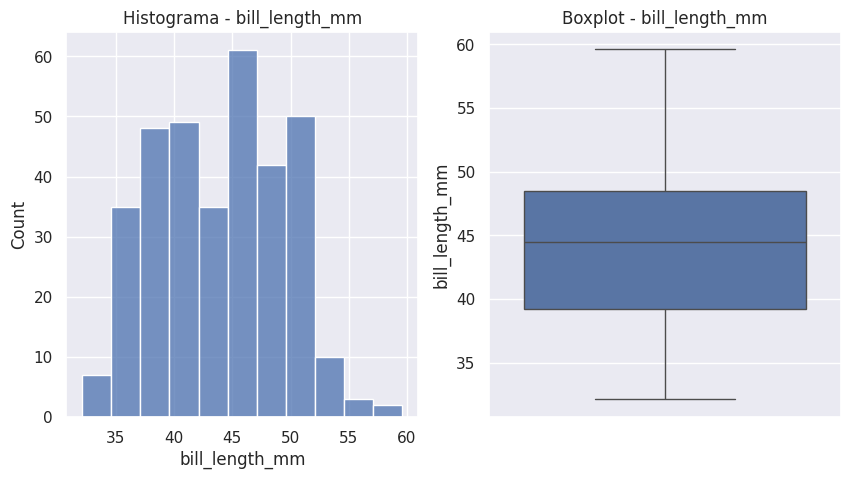

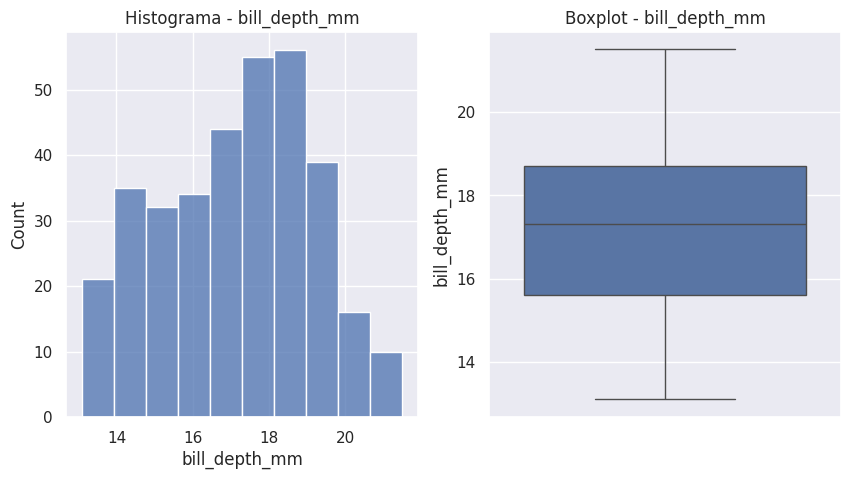

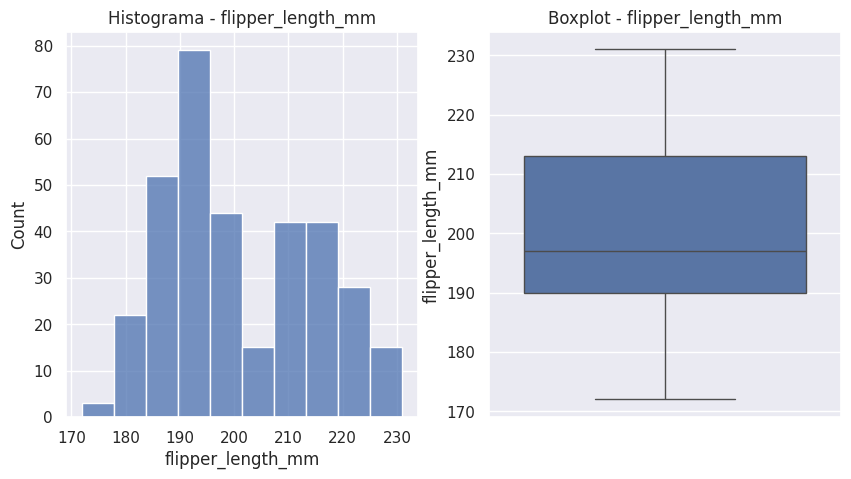

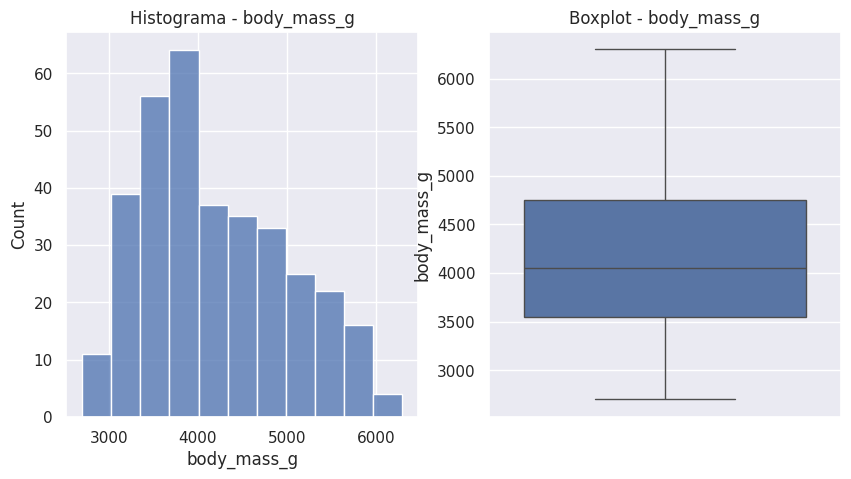

In [202]:
for col in variaveis_numericas:
  fig, ax = plt.subplots(1, 2)
  sns.histplot(data=penguins, x=col, ax=ax[0])
  ax[0].set_title(f'Histograma - {col}')
  sns.boxplot(data=penguins, y=col, ax=ax[1])
  ax[1].set_title(f'Boxplot - {col}')
  plt.show()

In [203]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [204]:
bins = [180, 190, 200, 210, 220, 230, 240]

penguins['flipper_length_mm_bin'] = pd.cut(penguins['flipper_length_mm'], bins=bins)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,"(180.0, 190.0]"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,"(180.0, 190.0]"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,"(190.0, 200.0]"
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,"(190.0, 200.0]"


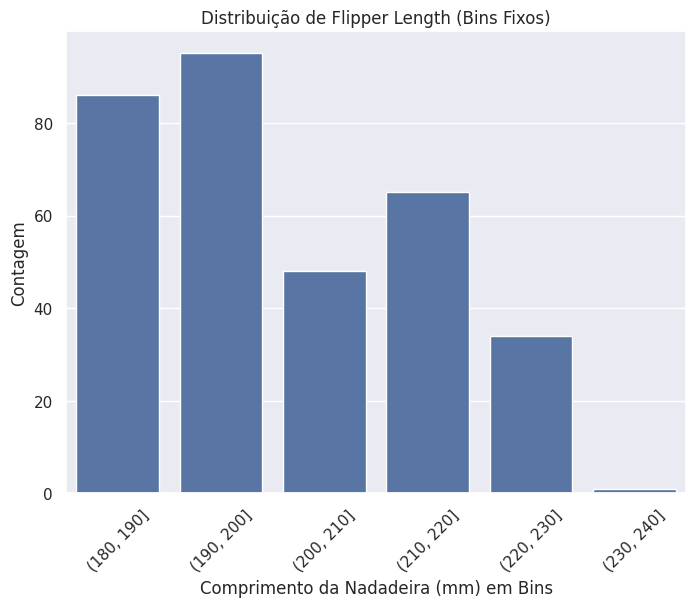

In [205]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=penguins, x='flipper_length_mm_bin', ax=ax)
ax.set_title('Distribuição de Flipper Length (Bins Fixos)')
ax.set_xlabel('Comprimento da Nadadeira (mm) em Bins')
ax.set_ylabel('Contagem')
ax.tick_params(axis='x', rotation=45)
plt.show()

#### **Resposta Exercício 3** Escolhi a variável flipper_length_mm para discretizar porque vi um desvio padrão alto.

#### Mas há nitidamente perda de informação detalhada para verificar padrões.

## Exercício 4: Discretização com Bins Variáveis no Dataset Palmer Penguins

#### Aplique a técnica de quantização com bins variáveis em uma variável contínua do dataset Palmer Penguins. Compare os resultados com a discretização feita no exercício anterior.

In [206]:
penguins['flipper_length_mm_qbin'] = pd.qcut(penguins['flipper_length_mm'], q=4)

In [207]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin,flipper_length_mm_qbin
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,"(180.0, 190.0]","(171.999, 190.0]"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,"(180.0, 190.0]","(171.999, 190.0]"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,"(190.0, 200.0]","(190.0, 197.0]"
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,"(190.0, 200.0]","(190.0, 197.0]"
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,"(200.0, 210.0]","(197.0, 213.0]"
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,"(200.0, 210.0]","(197.0, 213.0]"
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,"(190.0, 200.0]","(190.0, 197.0]"
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,"(200.0, 210.0]","(197.0, 213.0]"


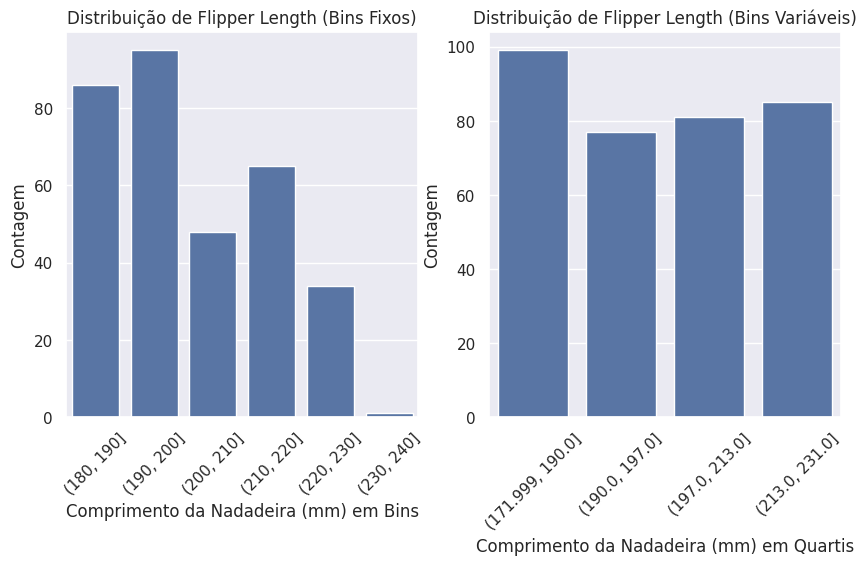

In [208]:
cols = ['flipper_length_mm_bin', 'flipper_length_mm_qbin']

fig, ax = plt.subplots(1, 2)
sns.countplot(data=penguins, x=cols[0], ax=ax[0])
ax[0].set_title('Distribuição de Flipper Length (Bins Fixos)')
ax[0].set_xlabel('Comprimento da Nadadeira (mm) em Bins')
ax[0].set_ylabel('Contagem')
ax[0].tick_params(axis='x', rotation=45)
sns.countplot(data=penguins, x=cols[1], ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Distribuição de Flipper Length (Bins Variáveis)')
ax[1].set_xlabel('Comprimento da Nadadeira (mm) em Quartis')
ax[1].set_ylabel('Contagem')
plt.show()

#### **Resposta Exercício 4**: A discretização por quartil ficou mais adequada por buscar dividir de forma variável os bins conforme a contagem de cada categoria. O problema de perda de dados continua.

## Exercício 5: Uso de FunctionTransformer no Dataset Palmer Penguins

Aplique a FunctionTransformer do Scikit-Learn em uma variável do dataset Palmer Penguins. Descreva o processo e explique como essa transformação pode ser benéfica.

In [209]:
def log10_trata_zero(x):
  return np.log10(x + 1)

log10_transformer = FunctionTransformer(log10_trata_zero)

In [210]:
penguins['body_mass_g'] = log10_transformer.fit_transform(penguins[['body_mass_g']])

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin,flipper_length_mm_qbin
0,Adelie,Torgersen,39.1,18.7,181.0,3.574147,male,2007,"(180.0, 190.0]","(171.999, 190.0]"
1,Adelie,Torgersen,39.5,17.4,186.0,3.579898,female,2007,"(180.0, 190.0]","(171.999, 190.0]"
2,Adelie,Torgersen,40.3,18.0,195.0,3.512017,female,2007,"(190.0, 200.0]","(190.0, 197.0]"
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.537945,female,2007,"(190.0, 200.0]","(190.0, 197.0]"


#### **Resposta Exercício 5**: a FunctionTransformer permite usar funções prontas ou criadas para tratar os dados, podendo ser usada nos pipelines e seguir o padrão da biblioteca, verdadeira boas práticas.

## Exercício 6: Aplicação de PowerTransformer no Dataset Palmer Penguins

Utilize a PowerTransformer do Scikit-Learn para transformar uma variável do dataset Palmer Penguins. Discuta os benefícios dessa transformação.

In [211]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin,flipper_length_mm_qbin
0,Adelie,Torgersen,39.1,18.7,181.0,3.574147,male,2007,"(180.0, 190.0]","(171.999, 190.0]"
1,Adelie,Torgersen,39.5,17.4,186.0,3.579898,female,2007,"(180.0, 190.0]","(171.999, 190.0]"
2,Adelie,Torgersen,40.3,18.0,195.0,3.512017,female,2007,"(190.0, 200.0]","(190.0, 197.0]"
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.537945,female,2007,"(190.0, 200.0]","(190.0, 197.0]"
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,3.602169,male,2009,"(200.0, 210.0]","(197.0, 213.0]"
340,Chinstrap,Dream,43.5,18.1,202.0,3.531607,female,2009,"(200.0, 210.0]","(197.0, 213.0]"
341,Chinstrap,Dream,49.6,18.2,193.0,3.577032,male,2009,"(190.0, 200.0]","(190.0, 197.0]"
342,Chinstrap,Dream,50.8,19.0,210.0,3.612890,male,2009,"(200.0, 210.0]","(197.0, 213.0]"


In [212]:
penguins['bill_length_mm'].min()

bill_length_mm_cleaned = penguins['bill_length_mm'].dropna()
bill_length_mm_boxcox, bill_length_mm_params = stats.boxcox(bill_length_mm_cleaned)

bill_length_mm_params

np.float64(0.6201739263374897)

**Resposta Exercício 6**: As transformações são muitas vezes essenciais, pois muitos modeos são sensíveis aos extremos e a curvas de dados normalizados.

## Exercício 7: Normalização Min-Max no Dataset Palmer Penguins

Aplique a normalização Min-Max do Scikit-Learn em uma ou mais variáveis do dataset Palmer Penguins. Explique como essa normalização impacta o modelo de Machine Learning.

In [213]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

penguins['bill_depth_mm_scaled'] = minmax_scale.fit_transform(penguins[['bill_depth_mm']])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin,flipper_length_mm_qbin,bill_depth_mm_scaled
0,Adelie,Torgersen,39.1,18.7,181.0,3.574147,male,2007,"(180.0, 190.0]","(171.999, 190.0]",0.666667
1,Adelie,Torgersen,39.5,17.4,186.0,3.579898,female,2007,"(180.0, 190.0]","(171.999, 190.0]",0.511905
2,Adelie,Torgersen,40.3,18.0,195.0,3.512017,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.583333
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.537945,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.738095


## Exercício 8: Normalização com Standard Scaler no Dataset Palmer Penguins

Utilize o StandardScaler do Scikit-Learn para normalizar variáveis do dataset Palmer Penguins. Discuta a diferença entre esta técnica e a normalização Min-Max.

In [214]:
standard_scale = preprocessing.StandardScaler()

penguins['bill_depth_mm_scaled_std'] = standard_scale.fit_transform(penguins[['bill_depth_mm']])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin,flipper_length_mm_qbin,bill_depth_mm_scaled,bill_depth_mm_scaled_std
0,Adelie,Torgersen,39.1,18.7,181.0,3.574147,male,2007,"(180.0, 190.0]","(171.999, 190.0]",0.666667,0.785449
1,Adelie,Torgersen,39.5,17.4,186.0,3.579898,female,2007,"(180.0, 190.0]","(171.999, 190.0]",0.511905,0.126188
2,Adelie,Torgersen,40.3,18.0,195.0,3.512017,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.583333,0.430462
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.537945,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.738095,1.089724


## Exercício 9: Regularização Norma-L2 no Dataset Palmer Penguins

Implemente um modelo de regressão linear com regularização norma-L2 utilizando o dataset Palmer Penguins.

In [215]:
l2_normalized_scale = preprocessing.Normalizer(norm='l2')

bill_depth_mm_temp = penguins['bill_depth_mm'].dropna().to_frame()
penguins['bill_depth_mm_normalized'] = np.nan

normalized_values = l2_normalized_scale.fit_transform(bill_depth_mm_temp)
penguins.loc[bill_depth_mm_temp.index, 'bill_depth_mm_normalized'] = normalized_values

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin,flipper_length_mm_qbin,bill_depth_mm_scaled,bill_depth_mm_scaled_std,bill_depth_mm_normalized
0,Adelie,Torgersen,39.1,18.7,181.0,3.574147,male,2007,"(180.0, 190.0]","(171.999, 190.0]",0.666667,0.785449,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3.579898,female,2007,"(180.0, 190.0]","(171.999, 190.0]",0.511905,0.126188,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3.512017,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.583333,0.430462,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.537945,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.738095,1.089724,1.0


## Exercício 10: Aplicação Complexa de FunctionTransformer com Múltiplas Transformações

Utilize a FunctionTransformer do Scikit-Learn para aplicar múltiplas transformações em sequência a uma variável do dataset Palmer Penguins. Por exemplo, aplique uma transformação logarítmica seguida por uma transformação exponencial inversa. Explique os passos realizados e analise como essas transformações impactam a distribuição da variável transformada.

#### Dicas:

Utilize FunctionTransformer para definir e aplicar cada transformação individualmente.
Analise a distribuição da variável antes e depois das transformações utilizando histogramas e estatísticas descritivas.

In [216]:
def apply_log_transform(x):
  return np.log1p(x)

def apply_exp_transform(x):
  return np.expm1(x)

log_transformer = FunctionTransformer(apply_log_transform)
exponetial_transformer = FunctionTransformer(apply_exp_transform)

penguins['flipper_length_mm_log'] = log_transformer.fit_transform(penguins[['flipper_length_mm']].dropna())
penguins['body_mass_g_exp'] = exponetial_transformer.fit_transform(penguins[['body_mass_g']].dropna())

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_length_mm_bin,flipper_length_mm_qbin,bill_depth_mm_scaled,bill_depth_mm_scaled_std,bill_depth_mm_normalized,flipper_length_mm_log,body_mass_g_exp
0,Adelie,Torgersen,39.1,18.7,181.0,3.574147,male,2007,"(180.0, 190.0]","(171.999, 190.0]",0.666667,0.785449,1.0,5.204007,34.664189
1,Adelie,Torgersen,39.5,17.4,186.0,3.579898,female,2007,"(180.0, 190.0]","(171.999, 190.0]",0.511905,0.126188,1.0,5.231109,34.869877
2,Adelie,Torgersen,40.3,18.0,195.0,3.512017,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.583333,0.430462,1.0,5.278115,32.515800
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.537945,female,2007,"(190.0, 200.0]","(190.0, 197.0]",0.738095,1.089724,1.0,5.267858,33.396161


## Exercício 11: Comparação de Transformações com PowerTransformer

Aplique a PowerTransformer do Scikit-Learn a uma variável do dataset Palmer Penguins. Em seguida, aplique uma transformação alternativa, como a normalização z-score (StandardScaler). Compare as distribuições resultantes das variáveis transformadas usando gráficos e estatísticas descritivas. Discuta as diferenças observadas e as situações em que cada técnica pode ser mais apropriada.

#### Dicas:

Utilize PowerTransformer e StandardScaler para aplicar as transformações.
Compare os resultados utilizando histogramas, box plots e estatísticas como média e desvio padrão.

In [217]:
df_penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


In [218]:
mean = df_penguins["bill_length_mm"].mean()
std = df_penguins["bill_length_mm"].std()

print(f"Média: {mean:.2f}")
print(f"Desvio padrão: {std:.2f}")

Média: 43.92
Desvio padrão: 5.46


/tmp/ipython-input-1666954290.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


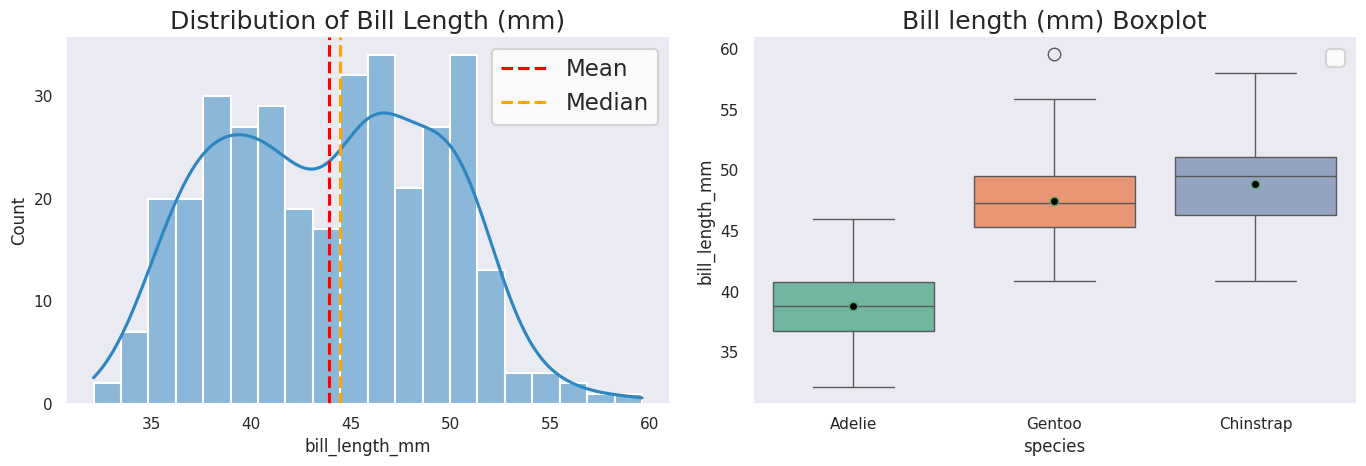

In [219]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.set_style('whitegrid')
sns.set_context('talk')

sns.histplot(data=df_penguins, x='bill_length_mm', kde=True, bins=20, color='#2E86C1', ax=ax[0])
ax[0].axvline(df_penguins['bill_length_mm'].mean(), color="red", linestyle="--", label="Mean")
ax[0].axvline(df_penguins['bill_length_mm'].median(), color="orange", linestyle="--", label="Median")
ax[0].set_title('Distribution of Bill Length (mm)')
ax[0].legend()
ax[0].grid(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.boxplot(data=df_penguins, y='bill_length_mm', x='species', hue='species', palette="Set2", showmeans=True, meanprops={"marker": "o", "markerfacecolor": "black", "markersize": 6}, ax=ax[1])
ax[1].set_title('Bill length (mm) Boxplot')
ax[1].legend()
ax[1].grid(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [220]:
df_penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


In [221]:
print(df_penguins.isna().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [228]:
df_penguins_transformed = df_penguins[['species', 'bill_length_mm']].copy()
df_penguins_transformed.head(2)

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5


In [231]:
imputer = SimpleImputer(strategy='mean')

df_penguins_transformed['bill_length_filled'] = imputer.fit_transform(df_penguins_transformed[['bill_length_mm']])
df_penguins_transformed.isna().sum()

,0
species,0
bill_length_mm,2
bill_length_filled,0


In [232]:
PowerTransform = preprocessing.PowerTransformer(method='yeo-johnson')
StandardScaler = preprocessing.StandardScaler()
df_penguins_transformed['bill_length_yeo_johnson'] = PowerTransform.fit_transform(df_penguins_transformed[['bill_length_filled']])
df_penguins_transformed['bill_length_z_score'] = StandardScaler.fit_transform(df_penguins_transformed[['bill_length_filled']])
df_penguins_transformed.head(5)

,species,bill_length_mm,bill_length_filled,bill_length_yeo_johnson,bill_length_z_score
0,Adelie,39.1,39.10000,-0.881427,-8.870812e-01
1,Adelie,39.5,39.50000,-0.804867,-8.134940e-01
2,Adelie,40.3,40.30000,-0.652608,-6.663195e-01
3,Adelie,NaN,43.92193,0.023142,-1.307172e-15
4,Adelie,36.7,36.70000,-1.347052,-1.328605e+00


In [233]:
mean_yeo = df_penguins_transformed["bill_length_yeo_johnson"].mean()
std_yeo = df_penguins_transformed["bill_length_yeo_johnson"].std()
mean_z_score = df_penguins_transformed["bill_length_z_score"].mean()
std_z_score = df_penguins_transformed["bill_length_z_score"].std()

print(f"Yeo-Johnson Mean: {mean_yeo:.2f}")
print(f"Yeo-Johnson Std: {std_yeo:.2f}")
print(f"Média Z-Score: {mean_z_score:.2f}")
print(f"Z-Score Std: {std_z_score:.2f}")

Yeo-Johnson Mean: -0.00
Yeo-Johnson Std: 1.00
Média Z-Score: -0.00
Z-Score Std: 1.00


In [234]:
features = ['bill_length_filled', 'bill_length_yeo_johnson', 'bill_length_z_score']

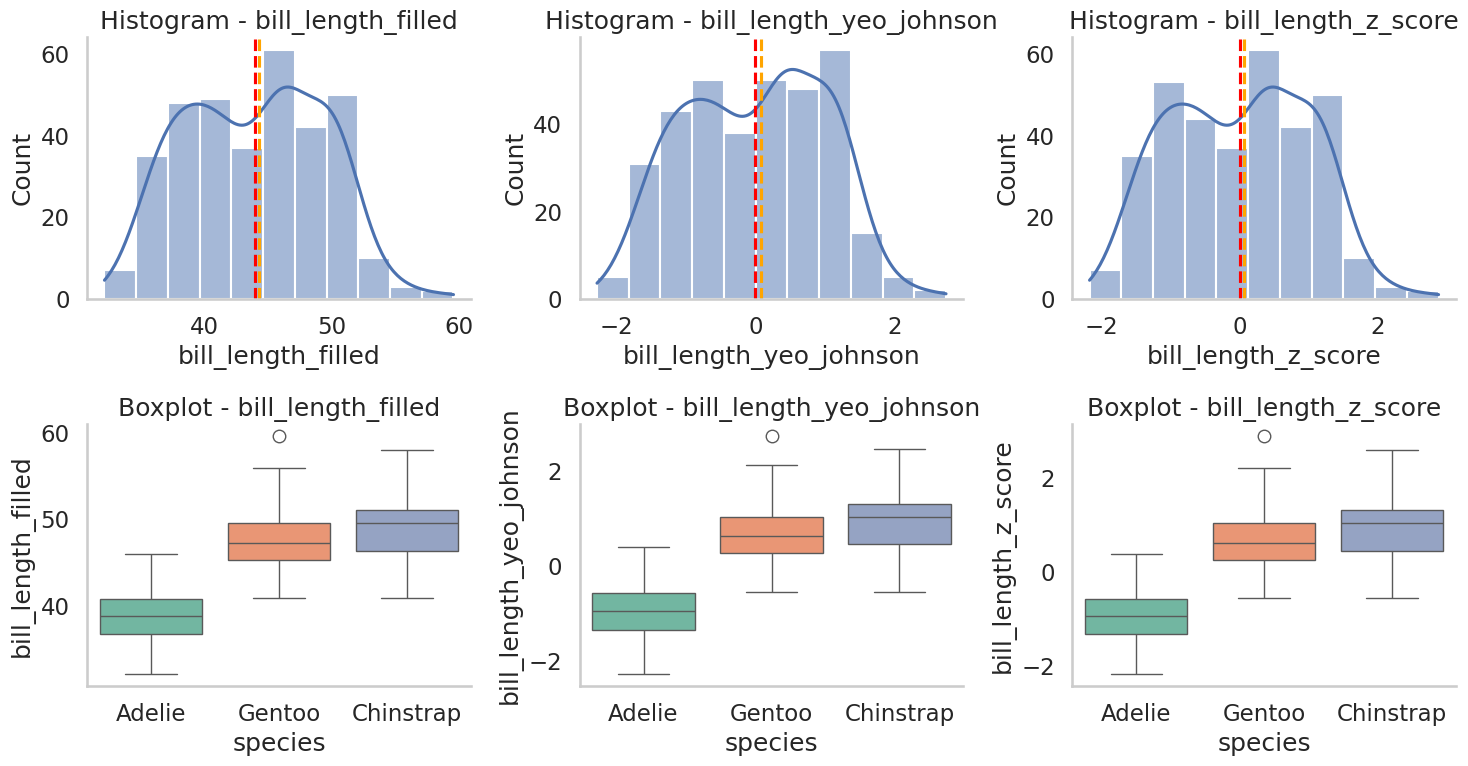

In [237]:
fig, ax = plt.subplots(2, len(features), figsize=(5*len(features), 8))

for i, col in enumerate(features):

    sns.histplot(data=df_penguins_transformed, x=col, ax=ax[0, i], kde=True)
    ax[0, i].axvline(df_penguins_transformed[col].mean(), color="red", linestyle="--", label="Mean")
    ax[0, i].axvline(df_penguins_transformed[col].median(), color="orange", linestyle="--", label="Median")
    ax[0, i].grid(False)
    ax[0, i].spines['right'].set_visible(False)
    ax[0, i].spines['top'].set_visible(False)
    ax[0, i].set_title(f'Histogram - {col}')

    sns.boxplot(data=df_penguins_transformed, y=col, x='species', hue='species', palette="Set2", ax=ax[1, i])
    ax[1, i].grid(False)
    ax[1, i].spines['right'].set_visible(False)
    ax[1, i].spines['top'].set_visible(False)
    ax[1, i].set_title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()


**Resposta Exercício 11**: A transformação Yeo-Johnson é mais adequada, mas nesta coluna não tem muita diferença, pois os dados já são bem distribuídos.

## Exercício 12: Normalização Min-Max Individualmente

Aplique a normalização Min-Max do Scikit-Learn a uma variável contínua do dataset Palmer Penguins. Visualize os dados normalizados e compare com os dados originais. Explique como a normalização Min-Max influencia a visualização dos dados e a comparação entre diferentes variáveis.

#### Dicas:

Utilize MinMaxScaler para normalizar a variável selecionada.
Visualize os dados antes e depois da normalização utilizando gráficos como pair plots ou heatmaps.

In [238]:
minmaxScaler = preprocessing.MinMaxScaler()

In [239]:
df_penguins_transformed['bill_length_min_max_scaler'] = minmaxScaler.fit_transform(df_penguins_transformed[['bill_length_filled']])
df_penguins_transformed.head(5)

,species,bill_length_mm,bill_length_filled,bill_length_yeo_johnson,bill_length_z_score,bill_length_min_max_scaler
0,Adelie,39.1,39.10000,-0.881427,-8.870812e-01,0.254545
1,Adelie,39.5,39.50000,-0.804867,-8.134940e-01,0.269091
2,Adelie,40.3,40.30000,-0.652608,-6.663195e-01,0.298182
3,Adelie,NaN,43.92193,0.023142,-1.307172e-15,0.429888
4,Adelie,36.7,36.70000,-1.347052,-1.328605e+00,0.167273


In [240]:
features = ['bill_length_filled', 'bill_length_min_max_scaler']

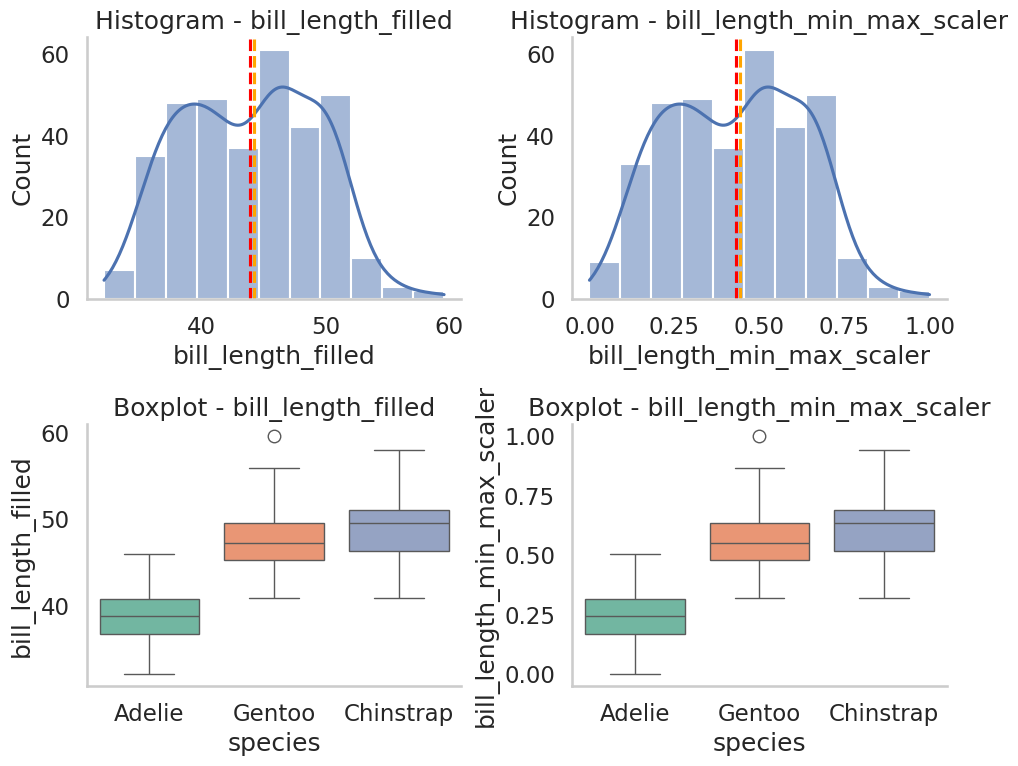

In [241]:
fig, ax = plt.subplots(2, len(features), figsize=(5*len(features), 8))

for i, col in enumerate(features):

    sns.histplot(data=df_penguins_transformed, x=col, ax=ax[0, i], kde=True)
    ax[0, i].axvline(df_penguins_transformed[col].mean(), color="red", linestyle="--", label="Mean")
    ax[0, i].axvline(df_penguins_transformed[col].median(), color="orange", linestyle="--", label="Median")
    ax[0, i].grid(False)
    ax[0, i].spines['right'].set_visible(False)
    ax[0, i].spines['top'].set_visible(False)
    ax[0, i].set_title(f'Histogram - {col}')

    sns.boxplot(data=df_penguins_transformed, y=col, x='species', hue='species', palette="Set2", ax=ax[1, i])
    ax[1, i].grid(False)
    ax[1, i].spines['right'].set_visible(False)
    ax[1, i].spines['top'].set_visible(False)
    ax[1, i].set_title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()


**Resposta Exercício 12**: Como essa coluna bill_length_mm já é relativamente bem distribuída, esse métodod de normalização não traz tanto ganho estatístico, apenas mudou a unidade. Esse método é muito sensível a outliers, há que se ter bastante cuidado.